<a href="https://colab.research.google.com/github/KaranOO/YBI-Foundation/blob/main/PROJECTS/Data_Science_Jobs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Features
  
  enrollee_id : Unique ID for candidate

  city: City code

  city_ development _index : Developement index of the city (scaled)

  gender: Gender of candidate

  relevent_experience: Relevant experience of candidate

  enrolled_university: Type of University course enrolled if any

  education_level: Education level of candidate

  major_discipline :Education major discipline of candidate

  experience: Candidate total experience in years

  company_size: No of employees in current employer's company

  company_type : Type of current employer

  lastnewjob: Difference in years between previous job and current job

  training_hours: training hours completed

  target: 0 – Not looking for job change, 1 – Looking for a job change

  Inspiration
  
  Predict the probability of a candidate will work for the company
  Interpret model(s) such a way that illustrate which features affect candidate decision

# Importing Libraries

In [770]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [771]:
train = pd.read_csv('https://www.dropbox.com/s/8pnfe5bnbe9jglt/JobChangeofDataScientists.csv?dl=1')
test = pd.read_csv('https://www.dropbox.com/s/8pnfe5bnbe9jglt/JobChangeofDataScientists.csv?dl=1')

In [772]:
train.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0


# As dataset is unbalanced, we need to clean the datra first

In [773]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  object 
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  last_new_job            18735 non-null  object 
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  int64  
dtypes: float64(1), int64(3), object(10)
me

In [774]:
train.isnull().sum()

enrollee_id                  0
city                         0
city_development_index       0
gender                    4508
relevent_experience          0
enrolled_university        386
education_level            460
major_discipline          2813
experience                  65
company_size              5938
company_type              6140
last_new_job               423
training_hours               0
target                       0
dtype: int64

In [775]:
train['gender']

0        Male
1        Male
2         NaN
3         NaN
4        Male
         ... 
19153    Male
19154    Male
19155    Male
19156    Male
19157     NaN
Name: gender, Length: 19158, dtype: object

In [776]:
train.shape

(19158, 14)

In [777]:
train=train.dropna()

In [778]:
train=train.reset_index(drop=True)

In [779]:
train.shape

(8955, 14)

In [780]:
test.shape

(19158, 14)

In [781]:
test.isnull().sum()

enrollee_id                  0
city                         0
city_development_index       0
gender                    4508
relevent_experience          0
enrolled_university        386
education_level            460
major_discipline          2813
experience                  65
company_size              5938
company_type              6140
last_new_job               423
training_hours               0
target                       0
dtype: int64

# Filling NULL values

## Gender

In [782]:
print(test['gender'].mode())

0    Male
dtype: object


In [783]:
test['gender'].fillna(value='Male',inplace=True)

## Enrolled University

In [784]:
#Filling enrolled_university column

test['enrolled_university'].mode()

0    no_enrollment
dtype: object

In [785]:
test['enrolled_university'].fillna(value='no_enrollment',inplace=True)

## Education Level

In [786]:
#Filling education_level

test['education_level'].mode()

0    Graduate
dtype: object

In [787]:
test['education_level'].fillna(value='Graduate',inplace=True)

## Major Discipline

In [788]:
#Filling major_discipline 

test['major_discipline'].mode()

0    STEM
dtype: object

In [789]:
test['major_discipline'].fillna(value='STEM',inplace=True)

## Experience

In [790]:
#Filling experience

test['experience'].mode()

0    >20
dtype: object

In [791]:
test['experience'].fillna(value='>20',inplace=True)

## Company Size

In [792]:
#Filling company size

test['company_size'].mode()

0    50-99
dtype: object

In [793]:
test['company_size'].fillna(value='50-99',inplace=True)

## Company Type

In [794]:
#Filling company_type

test['company_type'].mode()

0    Pvt Ltd
dtype: object

In [795]:
test['company_type'].fillna(value='Pvt Ltd',inplace=True)

## Last new job

In [796]:
#Filling last new job

test['last_new_job'].mode()

0    1
dtype: object

In [797]:
test['last_new_job'].fillna(value='1',inplace=True)

In [798]:
test.isnull().sum()

enrollee_id               0
city                      0
city_development_index    0
gender                    0
relevent_experience       0
enrolled_university       0
education_level           0
major_discipline          0
experience                0
company_size              0
company_type              0
last_new_job              0
training_hours            0
target                    0
dtype: int64

In [799]:
train.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0
1,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0
2,402,city_46,0.762,Male,Has relevent experience,no_enrollment,Graduate,STEM,13,<10,Pvt Ltd,>4,18,1
3,27107,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,7,50-99,Pvt Ltd,1,46,1
4,23853,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,5,5000-9999,Pvt Ltd,1,108,0


# Data visualization

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


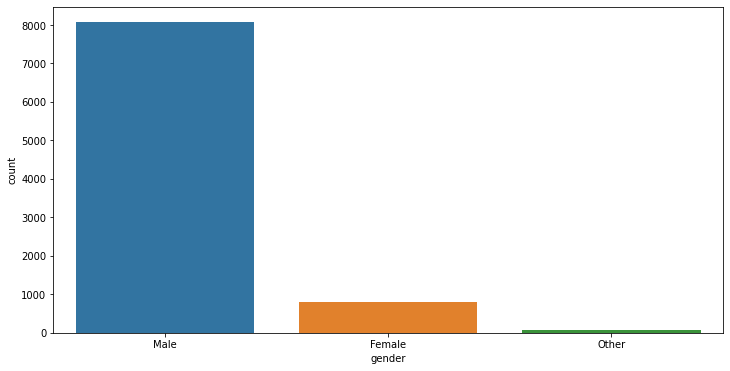

In [800]:
plt.figure(figsize=(12,6))
sns.countplot(train['gender'])
plt.show()

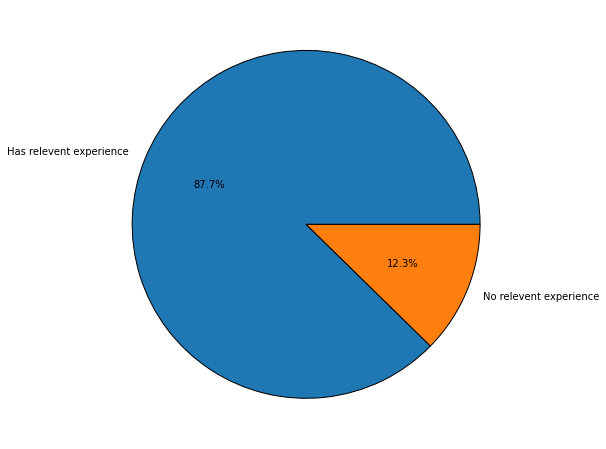

In [801]:
index = train['relevent_experience'].value_counts().index
values=train['relevent_experience'].value_counts()
plt.figure(figsize=(16,8))
plt.pie(values,labels=index,autopct="%1.1f%%",wedgeprops={'edgecolor':'black'})
plt.show()

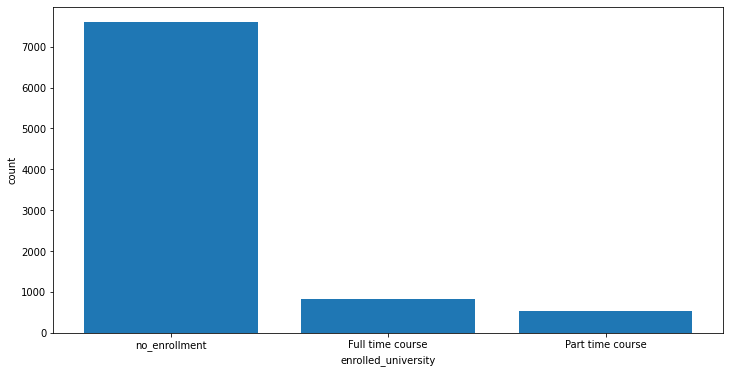

In [802]:
index=train['enrolled_university'].value_counts().index
values=train['enrolled_university'].value_counts()
plt.figure(figsize=(12,6))
plt.bar(index, values,)
plt.xlabel("enrolled_university")
plt.ylabel("count")
plt.show()

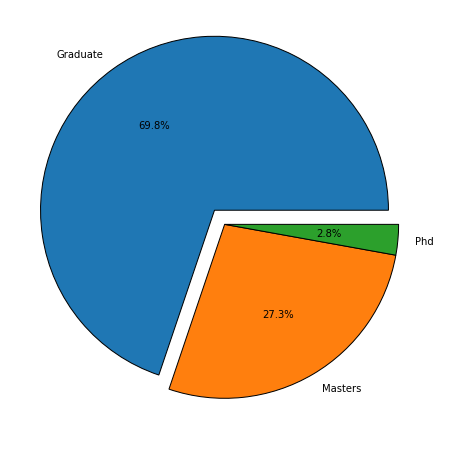

In [803]:
index=train['education_level'].value_counts().index
values=train['education_level'].value_counts()
plt.figure(figsize=(16,8))
plt.pie(values,labels=index,autopct="%1.1f%%",wedgeprops={'edgecolor':'black'},explode=[0.1,0,0])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


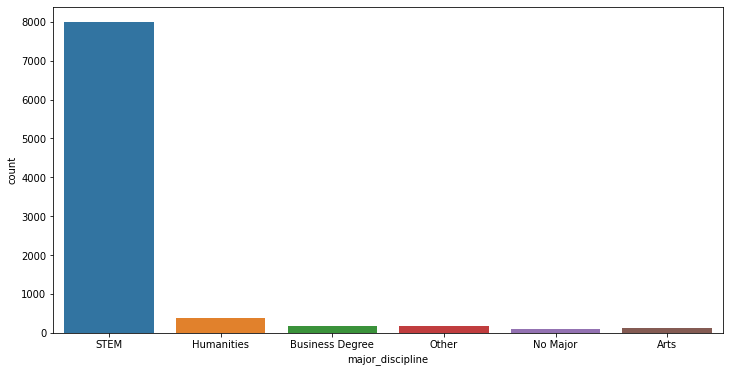

STEM               7989
Humanities          378
Other               177
Business Degree     170
Arts                129
No Major            112
Name: major_discipline, dtype: int64


In [804]:
plt.figure(figsize=(12,6))
sns.countplot(train['major_discipline'])
plt.show()
print(train['major_discipline'].value_counts())
# STEM - science,technology, engineering, mathematics

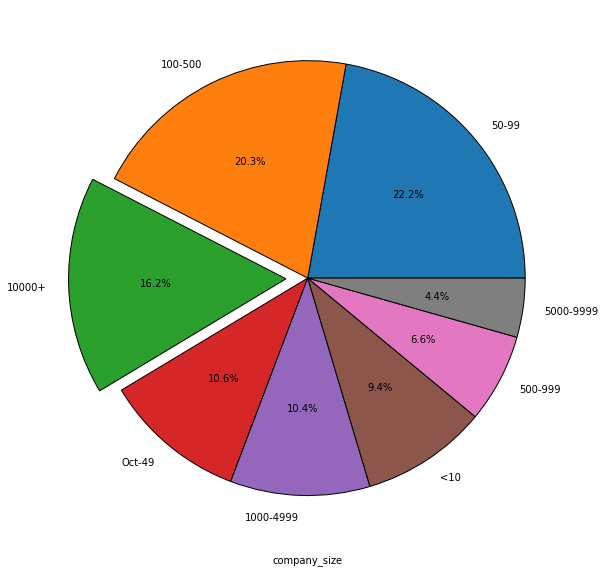

In [805]:
index=train['company_size'].value_counts().index
values=train['company_size'].value_counts()
plt.figure(figsize=(18,10))
plt.xlabel('company_size')
plt.pie(values,labels=index,autopct="%1.1f%%",wedgeprops={"edgecolor":"black"},explode=[0,0,0.1,0,0,0,0,0])
plt.show()

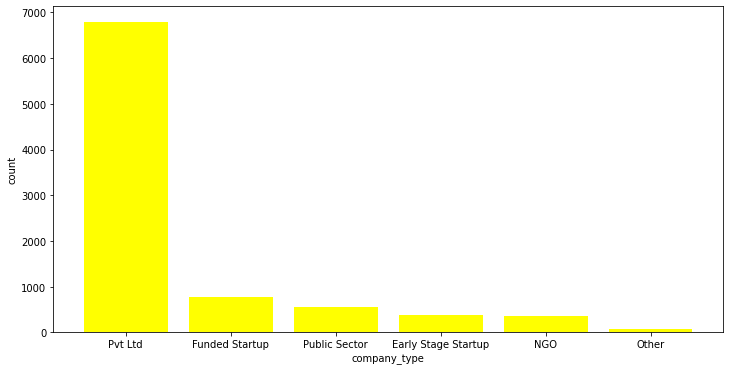

In [806]:
index=train['company_type'].value_counts().index
values=train['company_type'].value_counts()
plt.figure(figsize=(12,6))
plt.bar(index, values, color ='yellow')
plt.xlabel("company_type")
plt.ylabel("count")
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


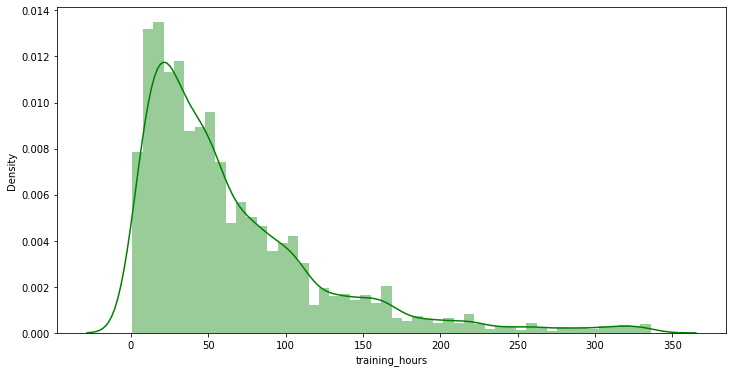

In [807]:
plt.figure(figsize=(12,6))
sns.distplot(train['training_hours'],color='green')
plt.show()

In [808]:
train.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0
1,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0
2,402,city_46,0.762,Male,Has relevent experience,no_enrollment,Graduate,STEM,13,<10,Pvt Ltd,>4,18,1
3,27107,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,7,50-99,Pvt Ltd,1,46,1
4,23853,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,5,5000-9999,Pvt Ltd,1,108,0


In [809]:
train['experience'].value_counts()

>20    1881
5       575
10      551
6       535
9       533
7       485
4       480
3       428
8       398
15      398
11      372
14      333
16      304
2       297
12      293
13      235
17      206
19      179
18      168
1       121
<1       97
20       86
Name: experience, dtype: int64

In [810]:
exp_20=train.loc[train['experience']=='>20']

In [811]:
exp_20.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
1,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0
5,25619,city_61,0.913,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,1000-4999,Pvt Ltd,3,23,0
11,14928,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,100-500,Pvt Ltd,3,40,0
13,26966,city_160,0.920,Female,Has relevent experience,no_enrollment,Graduate,STEM,>20,100-500,Pvt Ltd,>4,82,0
16,10164,city_114,0.926,Male,Has relevent experience,no_enrollment,Phd,STEM,>20,100-500,Pvt Ltd,4,42,1


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


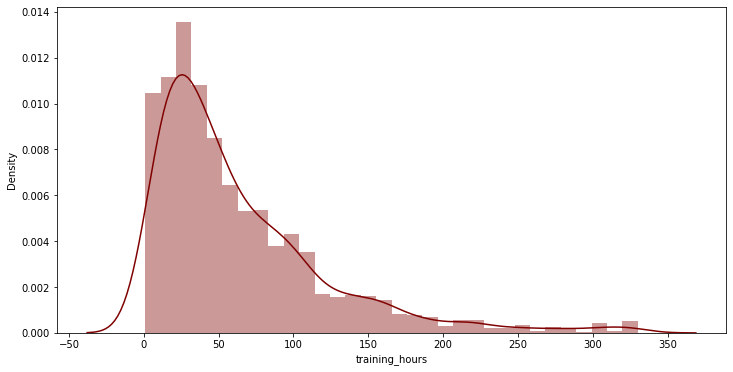

In [812]:
plt.figure(figsize=(12,6))
sns.distplot(exp_20['training_hours'],color='maroon')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


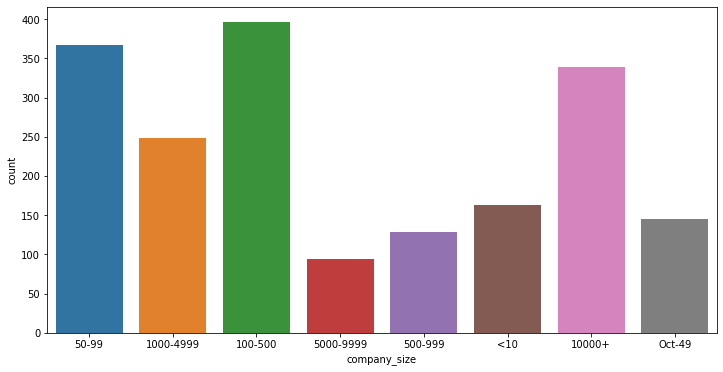

In [813]:
plt.figure(figsize=(12,6))
sns.countplot(exp_20['company_size'])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


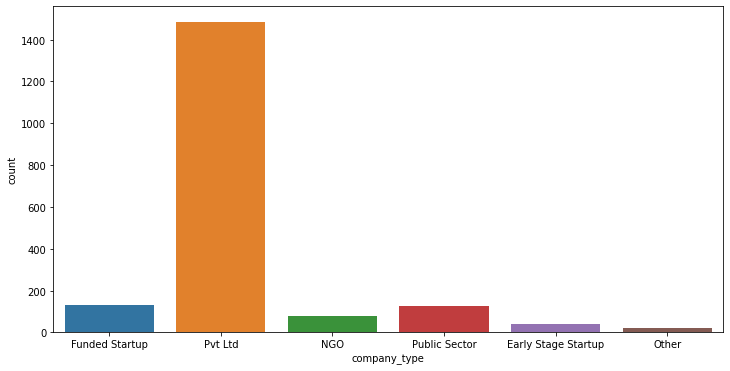

In [814]:
plt.figure(figsize=(12,6))
sns.countplot(exp_20['company_type'])
plt.show()

In [815]:
train.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0
1,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0
2,402,city_46,0.762,Male,Has relevent experience,no_enrollment,Graduate,STEM,13,<10,Pvt Ltd,>4,18,1
3,27107,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,7,50-99,Pvt Ltd,1,46,1
4,23853,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,5,5000-9999,Pvt Ltd,1,108,0


In [816]:
train['target']=train['target'].astype('int64')

#Comparing features with target

## 0- Not looking for job
## 1- Looking for job

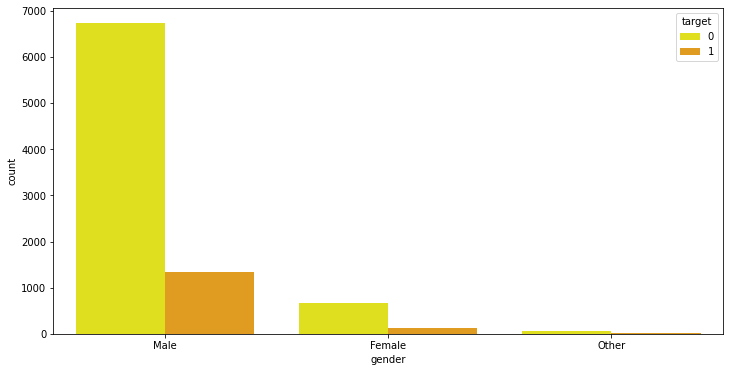

In [817]:
plt.figure(figsize=(12,6))
sns.countplot(x="gender",hue="target",data=train,palette=['yellow',"orange"])
plt.show()

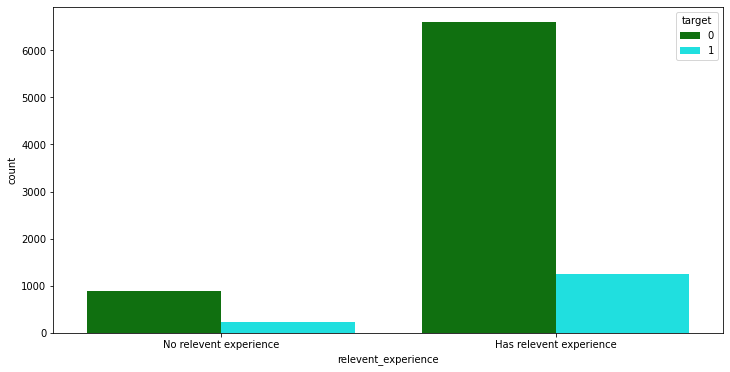

In [818]:
plt.figure(figsize=(12,6))
sns.countplot(x="relevent_experience",hue="target",data=train,palette=['green',"cyan"])
plt.show()

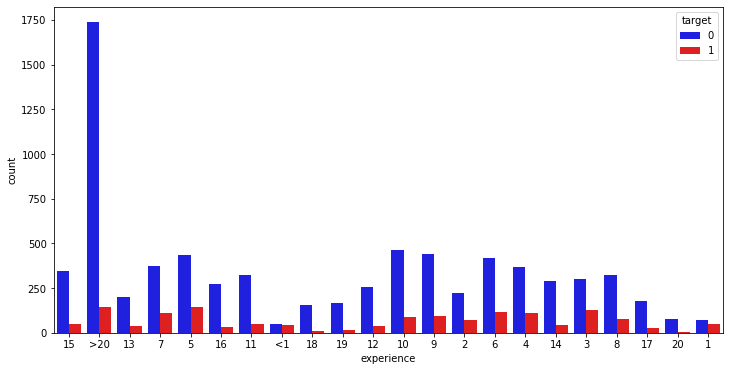

In [819]:
plt.figure(figsize=(12,6))
sns.countplot(x="experience",hue="target",data=train,palette=['blue',"red"])
plt.show()

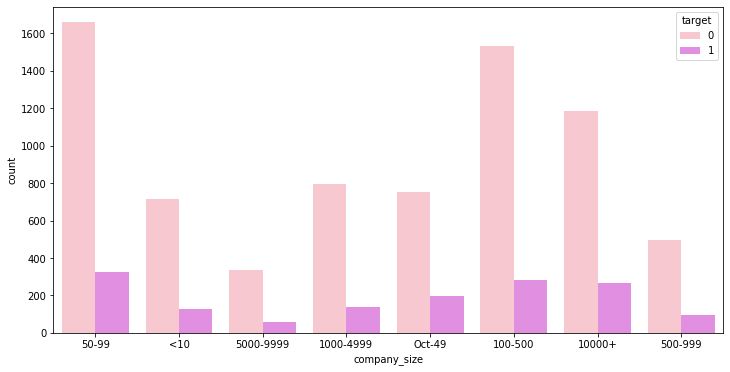

In [820]:
plt.figure(figsize=(12,6))
sns.countplot(x="company_size",hue="target",data=train,palette=['pink',"violet"])
plt.show()

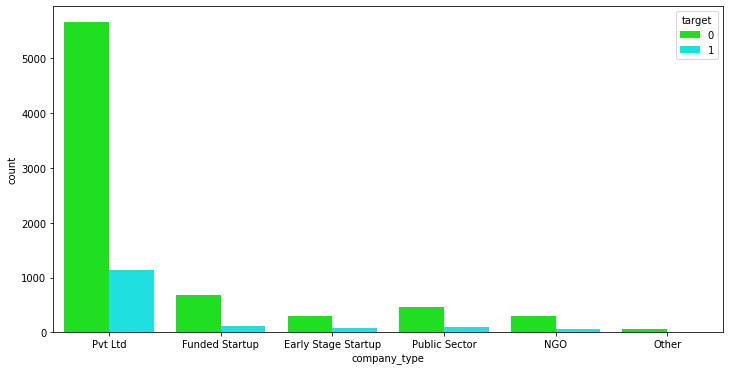

In [821]:
plt.figure(figsize=(12,6))
sns.countplot(x="company_type",hue="target",data=train,palette=['lime',"cyan"])
plt.show()

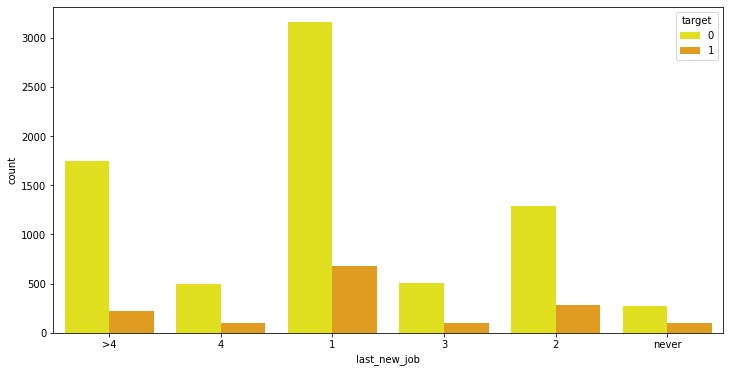

In [822]:
plt.figure(figsize=(12,6))
sns.countplot(x="last_new_job",hue="target",data=train,palette=['yellow',"orange"])
plt.show()

In [823]:
train.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0
1,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0
2,402,city_46,0.762,Male,Has relevent experience,no_enrollment,Graduate,STEM,13,<10,Pvt Ltd,>4,18,1
3,27107,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,7,50-99,Pvt Ltd,1,46,1
4,23853,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,5,5000-9999,Pvt Ltd,1,108,0


In [824]:
train['relevent_experience']=train['relevent_experience'].replace({'No relevent experience':0,'Has relevent experience':1})

In [825]:
dummies=pd.get_dummies(train[['enrolled_university']])
train = pd.concat([train.drop(['enrolled_university'],axis=1), dummies],axis=1)

In [826]:
dummies=pd.get_dummies(train[['gender']])
train = pd.concat([train.drop(['gender'],axis=1), dummies],axis=1)

In [827]:
train=train.drop("education_level",axis=1)

In [828]:
dummies=pd.get_dummies(train[['major_discipline']])
train = pd.concat([train.drop(['major_discipline'],axis=1), dummies],axis=1)

In [829]:
dummies=pd.get_dummies(train[['experience']])
train = pd.concat([train.drop(['experience'],axis=1), dummies],axis=1)

In [830]:
dummies=pd.get_dummies(train[['company_size']])
train = pd.concat([train.drop(['company_size'],axis=1), dummies],axis=1)

In [831]:
dummies=pd.get_dummies(train[['company_type']])
train = pd.concat([train.drop(['company_type'],axis=1), dummies],axis=1)

In [832]:
dummies=pd.get_dummies(train[['last_new_job']])
train = pd.concat([train.drop(['last_new_job'],axis=1), dummies],axis=1)

In [833]:
test.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,50-99,Pvt Ltd,1,36,1
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0
2,11561,city_21,0.624,Male,No relevent experience,Full time course,Graduate,STEM,5,50-99,Pvt Ltd,never,83,0
3,33241,city_115,0.789,Male,No relevent experience,no_enrollment,Graduate,Business Degree,<1,50-99,Pvt Ltd,never,52,1
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0


In [834]:
test['relevent_experience']=test['relevent_experience'].replace({'No relevent experience':0,'Has relevent experience':1})

In [835]:
dummies=pd.get_dummies(test[['gender']])
test = pd.concat([test.drop(['gender'],axis=1), dummies],axis=1)

In [836]:
dummies=pd.get_dummies(test[['enrolled_university']])
test = pd.concat([test.drop(['enrolled_university'],axis=1), dummies],axis=1)

In [837]:
test=test.drop("education_level",axis=1)

In [838]:
dummies=pd.get_dummies(test[['major_discipline']])
test = pd.concat([test.drop(['major_discipline'],axis=1), dummies],axis=1)

In [839]:
dummies=pd.get_dummies(test[['experience']])
test = pd.concat([test.drop(['experience'],axis=1), dummies],axis=1)

In [840]:
dummies=pd.get_dummies(test[['company_size']])
test = pd.concat([test.drop(['company_size'],axis=1), dummies],axis=1)

In [841]:
dummies=pd.get_dummies(test[['company_type']])
test = pd.concat([test.drop(['company_type'],axis=1), dummies],axis=1)

In [842]:
dummies=pd.get_dummies(test[['last_new_job']])
test = pd.concat([test.drop(['last_new_job'],axis=1), dummies],axis=1)

In [843]:
print(train.shape)
print(test.shape)

(8955, 60)
(19158, 60)


In [844]:
train.columns

Index(['enrollee_id', 'city', 'city_development_index', 'relevent_experience',
       'training_hours', 'target', 'enrolled_university_Full time course',
       'enrolled_university_Part time course',
       'enrolled_university_no_enrollment', 'gender_Female', 'gender_Male',
       'gender_Other', 'major_discipline_Arts',
       'major_discipline_Business Degree', 'major_discipline_Humanities',
       'major_discipline_No Major', 'major_discipline_Other',
       'major_discipline_STEM', 'experience_1', 'experience_10',
       'experience_11', 'experience_12', 'experience_13', 'experience_14',
       'experience_15', 'experience_16', 'experience_17', 'experience_18',
       'experience_19', 'experience_2', 'experience_20', 'experience_3',
       'experience_4', 'experience_5', 'experience_6', 'experience_7',
       'experience_8', 'experience_9', 'experience_<1', 'experience_>20',
       'company_size_100-500', 'company_size_1000-4999', 'company_size_10000+',
       'company_size_50-99

In [845]:
X=train.drop(['enrollee_id','city','target'],axis=1)
y=train[['target']]

In [846]:
import sklearn
from sklearn.model_selection import train_test_split

In [847]:
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.7,random_state=2529)

In [848]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(6268, 57)
(6268, 1)
(2687, 57)
(2687, 1)


In [849]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()

In [850]:
model.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [851]:
predictions=model.predict(X_test)

In [852]:
model.score(X_test,y_test)

0.8418310383327131